# Loading data

In [25]:
#!pip3 install --upgrade statsmodels

In [26]:
import numpy as np #Import Numpy
import pandas as pd #Import Pandas
import matplotlib.pyplot as plt #Import Matplotlib
import seaborn as sns #Import Seaborn
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf #Import Statsmodels | Plot Correlation / Autocorrelation
from sklearn.linear_model import LinearRegression #Import Linear Regression rom Scipykit
from statsmodels.tsa.ar_model import AutoReg #Import AutoRegression from Statsmodel
import datetime #Import Datetime

In [27]:
df = pd.read_excel('vente_maillots_de_bain.xlsx', sheet_name='Sheet2') #Import Excel file
df.head()

,Years,Sales,Unnamed: 2
0,2001-01-01,139.7,NaN
1,2001-02-01,114.3,NaN
2,2001-03-01,101.6,NaN
3,2001-04-01,152.4,NaN
4,2001-05-01,215.9,NaN


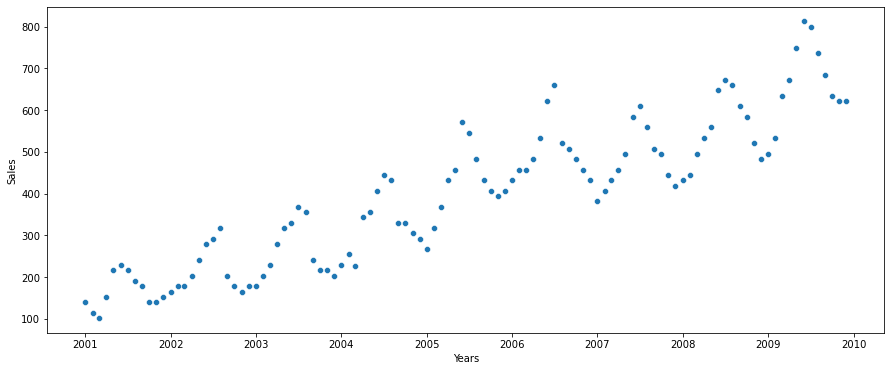

In [28]:
plt.figure(figsize=(15, 6)) #Plot a figure 15 x 6
sns.scatterplot(x='Years', y='Sales', data = df) #Scatterplot Years and Sales

plt.show()

In [29]:
df['time'] = np.arange(1,109, 1) #Create Time Dimension
df

,Years,Sales,Unnamed: 2,time
0,2001-01-01,139.7,NaN,1
1,2001-02-01,114.3,NaN,2
2,2001-03-01,101.6,NaN,3
3,2001-04-01,152.4,NaN,4
4,2001-05-01,215.9,NaN,5
...,...,...,...,...
103,2009-08-01,736.6,NaN,104
104,2009-09-01,685.5,NaN,105
105,2009-10-01,635.0,NaN,106
106,2009-11-01,622.3,NaN,107


In [30]:
df_train = df.loc[:81] #Split to 81
df_test = df.loc[82:] #split from 82

In [31]:
x_train = df_train[['time']].values #Dimension values
y_train = df_train[['Sales']].values


x_test = df_test[['time']].values
y_test = df_test[['Sales']].values


model_trend = LinearRegression() #init Linear Regression

model_trend.fit(x_train, y_train) #fit the data to linear regression


LinearRegression()

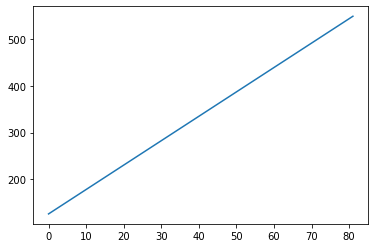

In [32]:
y_fitted_values = model_trend.predict(x_train) #fitted value
y_predicted_value = model_trend.predict(x_test) # predicted value
plt.plot(y_fitted_values )

calculer l'intervalle de confiance

.calculer l'erreur
.calculer l'ecart type
.calculer l'intervalle de confiance que l'on souhaite

In [33]:
error = y_train - y_fitted_values #Calculate Error
std_error = error.std() #Calculate Standard deviation
interval = 4.4 * std_error #Set interval * Standard deviation error

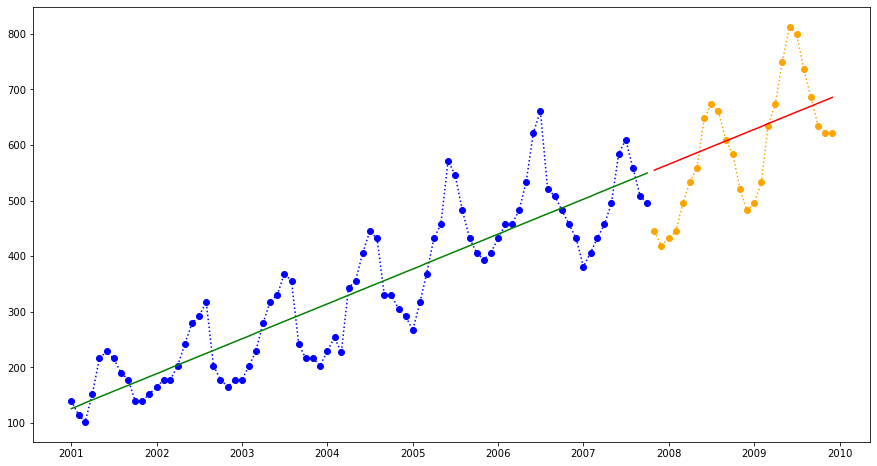

In [34]:
plt.figure(figsize=(15, 8))
#train base : Analise
plt.plot(df_train['Years'], y_train, "bo:")
plt.plot(df_train['Years'], y_fitted_values, "g")

#test base : predict
plt.plot(df_test['Years'], y_test, "o:", color = "orange")
plt.plot(df_test['Years'], y_predicted_value, color = "red")
plt.show()

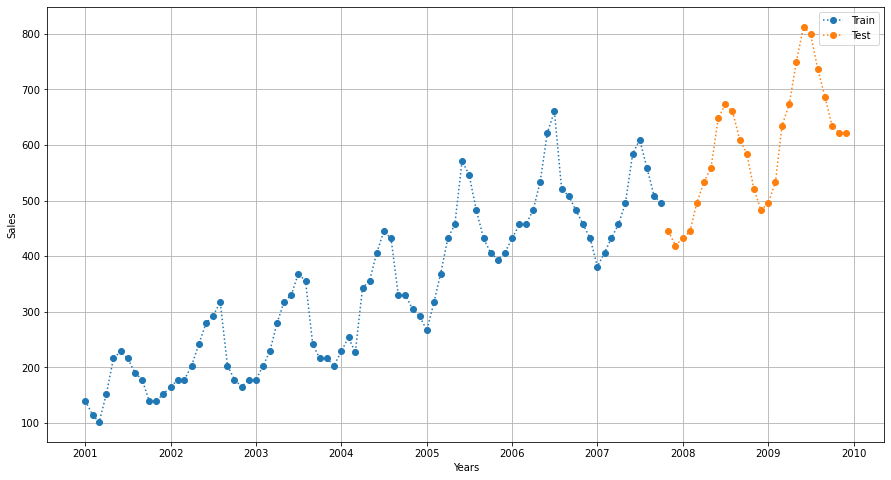

In [35]:
#Autocorrelation + Stationnarisation

df_train3 = df_train.copy() #Create a copy of Dataframe to manipulate
df_test3 = df_test.copy()

plt.figure(figsize=(15,8))
plt.plot(df_train3['Years'],df_train3['Sales'], 'o:', label='Train')
plt.plot(df_test3['Years'],df_test3['Sales'], 'o:', label='Test')
plt.ylabel('Sales')
plt.xlabel('Years')
plt.legend()

plt.grid()

Text(0.5, 0, 'Lags')

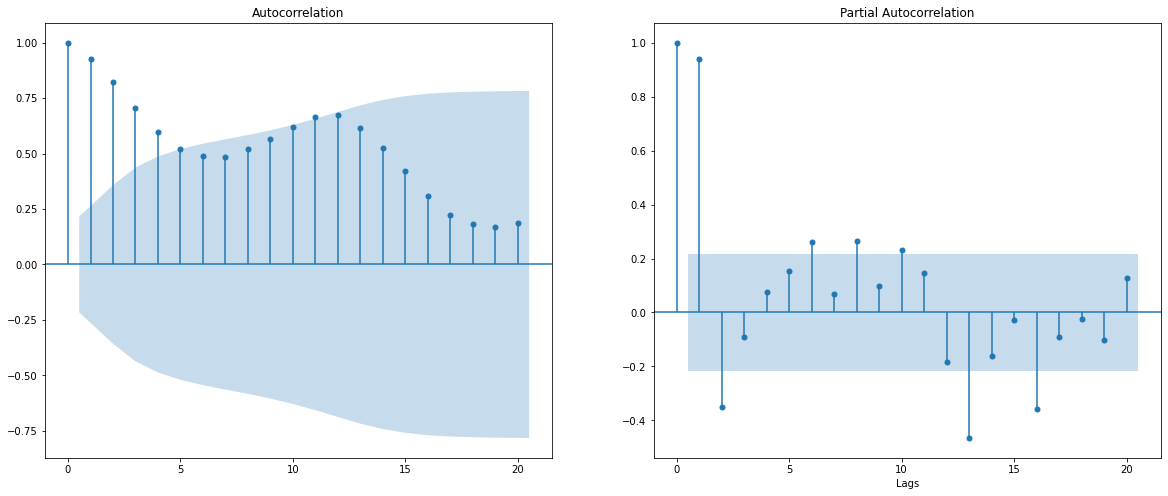

In [36]:
fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(20,8)) #Plot Correlation and Autocorrelation

autocor = plot_acf(df_train3['Sales'],ax=ax[0])
plt.xlabel('Lags')
part_cor = plot_pacf(df_train3['Sales'],ax=ax[1])
plt.xlabel('Lags')

In [37]:
diffe = df_train3['Sales'].diff().reindex() #Pandas difference function

diffe.head()

0     NaN
1   -25.4
2   -12.7
3    50.8
4    63.5
Name: Sales, dtype: float64

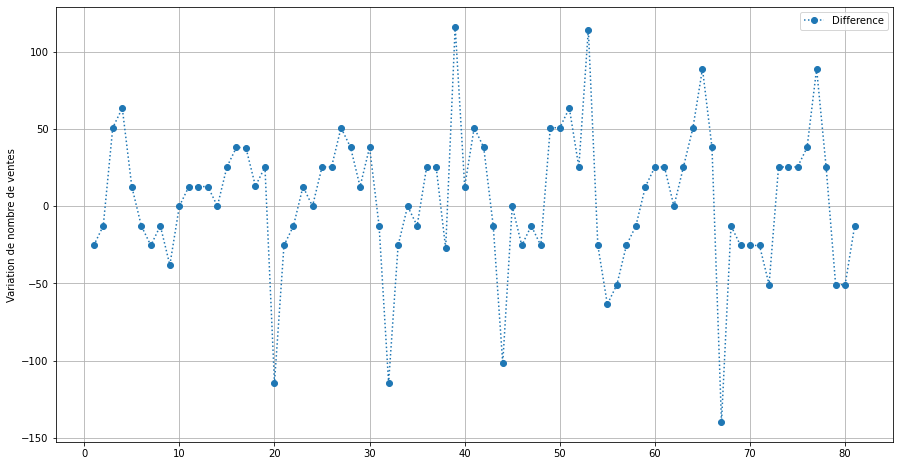

In [38]:
plt.figure(figsize=(15,8)) 

#Plot difference
plt.plot(diffe, 'o:')
plt.legend(['Difference'])
plt.ylabel('Variation de nombre de ventes')
plt.grid()
plt.show()

In [39]:
diffe2 = diffe.dropna(inplace=True) #Drop Not a Number values

diffe.head()

1   -25.4
2   -12.7
3    50.8
4    63.5
5    12.7
Name: Sales, dtype: float64

/Users/greg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


Text(0.5, 0, 'Lags')

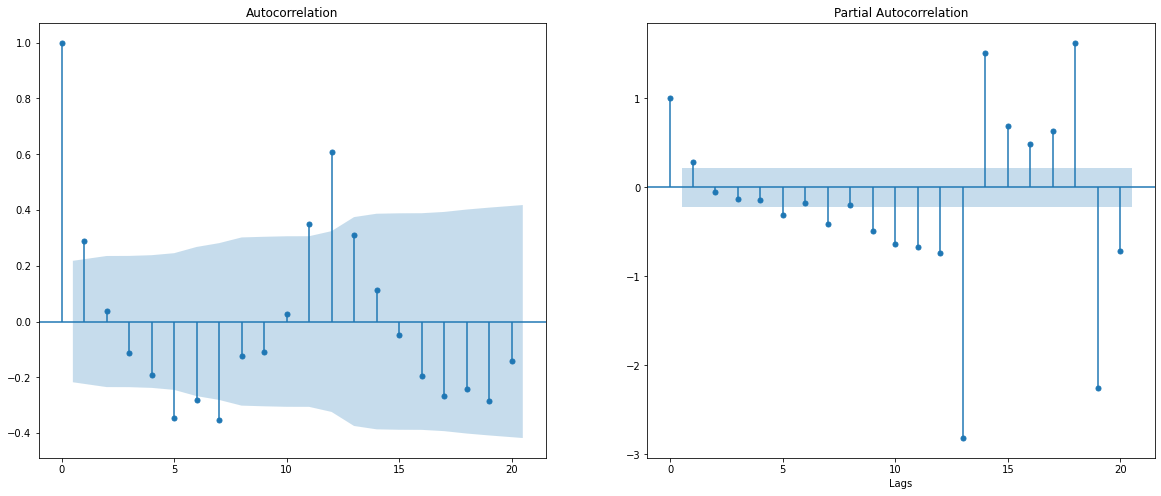

In [40]:
fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(20,8))

#Plot autocorrelation
autocor = plot_acf(diffe,ax=ax[0])
plt.xlabel('Lags')

#Plot partial autocorrelation
part_cor = plot_pacf(diffe,ax=ax[1])
plt.xlabel('Lags')

In [41]:
x_train = df_train3.set_index('Years')
x_test = df_test3.set_index('Years')

x_train.drop(columns=['time'], inplace=True)
x_test.drop(columns=['time'], inplace=True)

x_train.head()

,Sales,Unnamed: 2
Years,,
2001-01-01,139.7,NaN
2001-02-01,114.3,NaN
2001-03-01,101.6,NaN
2001-04-01,152.4,NaN
2001-05-01,215.9,NaN


In [42]:
model_ar = AutoReg(x_train, lags=12).fit() #Generate linear regression and fit values

/Users/greg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/greg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


TypeError: can only concatenate list (not "str") to list

In [ ]:
fitted_values = model_ar.fittedvalues # Fit all values

<function matplotlib.pyplot.show>

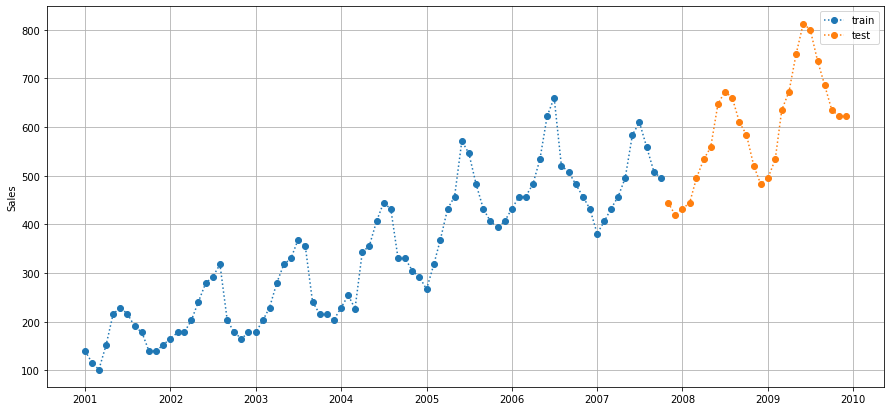

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df_train3['Years'], df_train3['Sales'], 'o:')
plt.plot(df_test3['Years'], df_test3['Sales'], 'o:')
plt.legend(['train', 'test','AR(12) Trainset'])
plt.ylabel('Sales')
plt.grid()
plt.show

In [ ]:
df_test3.head() #Show Beginning
df_test3.tail() #Show end

,Years,Sales,time
103,2009-08-01,736.6,104
104,2009-09-01,685.5,105
105,2009-10-01,635.0,106
106,2009-11-01,622.3,107
107,2009-12-01,622.3,108


In [ ]:
start = datetime.datetime.strptime('2007-11-01', '%Y-%m-%d')
end = datetime.datetime.strptime('2009-12-01', '%Y-%m-%d')

In [ ]:
print(start)
print(end)

2007-11-01 00:00:00
2009-12-01 00:00:00


In [ ]:
prediction_test =  model_ar.predict(start, end) #Predict from Start to End 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:157: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


In [ ]:
error = model_ar.resid
std_error = error.std()
interval_ar = 4.4 * std_error 

<function matplotlib.pyplot.show>

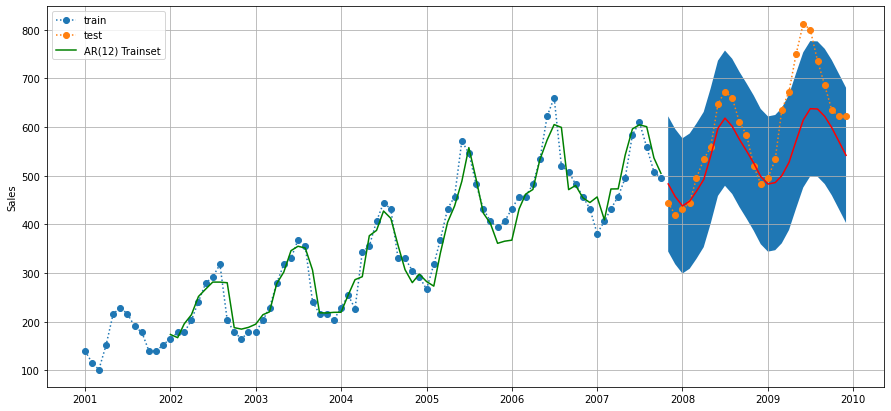

In [ ]:
plt.figure(figsize=(15,7))

#Verité terrain
plt.plot(df_train3['Years'], df_train3['Sales'], 'o:')
plt.plot(df_test3['Years'], df_test3['Sales'], 'o:')

#Prediction du model
plt.plot(fitted_values, 'g-')
plt.plot(prediction_test, 'r-')

#Intervalle de confiance
plt.fill_between(df_test3['Years'], prediction_test.values + interval_ar, prediction_test.values - interval_ar)

plt.legend(['train', 'test','AR(12) Trainset'])
plt.ylabel('Sales')
plt.grid()
plt.show